/tmp/ipykernel_2652445/2014845839.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.multiply(data_pm, 15304)


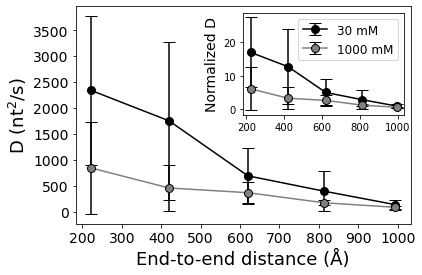

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Load the data from files
dmod1 = np.loadtxt('diff_com_200_7.txt')
dmod2 = np.loadtxt('diff_com_400_7.txt')
dmod3 = np.loadtxt('diff_com_600_7.txt')
dmod4 = np.loadtxt('diff_com_800_7.txt')
dmod5 = np.loadtxt('diff_com_1000_7.txt')

dmop1 = np.loadtxt('diff_com_200_0.txt')
dmop2 = np.loadtxt('diff_com_400_0.txt')
dmop3 = np.loadtxt('diff_com_600_0.txt')
dmop4 = np.loadtxt('diff_com_800_0.txt')
dmop5 = np.loadtxt('diff_com_1000_0.txt')

# Combine the data into a list
data_pm = [dmod1, dmod2, dmod3, dmod4, dmod5]
data1_pm = [dmop1, dmop2, dmop3, dmop4, dmop5]


data = np.multiply(data_pm, 15304)
data1 = np.multiply(data1_pm, 15304)

means = []
stds = []
means1 = []
stds1 = []

for item in data:
    mean_d = np.mean(item)
    std_d = np.std(item)
    means.append(mean_d)
    stds.append(std_d)
    
for item1 in data1:
    mean_d = np.mean(item1)
    std_d = np.std(item1)
    means1.append(mean_d)
    stds1.append(std_d)

x = [222.0, 420.0, 620.0, 812.0, 994.0]

means_mod = []
stds_mod = []

num = min(means)

for i in range(len(means)):
    a = means[i]/num
    b = stds[i]/num
    means_mod.append(a)
    stds_mod.append(b)
means1_mod = []
stds1_mod = []

for i in range(len(means1)):
    a1 = means1[i]/num
    b1 = stds1[i]/num
    means1_mod.append(a1)
    stds1_mod.append(b1)

fig, ax = plt.subplots()
ax.errorbar(x, means, yerr=stds, capsize=6, fmt='o-', color= 'black', markeredgecolor='black', ecolor='black', markersize=8)
ax.errorbar(x, means1, yerr=stds1, capsize=6, fmt='o-', color= 'gray', markeredgecolor='black', ecolor='black', markersize=8)

axins = ax.inset_axes([0.5, 0.5, 0.48, 0.47]) # specify the position and size of the inset plot
axins.errorbar(x, means_mod, yerr=stds_mod, capsize=6, fmt='o-', color= 'black', markeredgecolor='black', ecolor='black', markersize=8, label="30 mM")
axins.errorbar(x, means1_mod, yerr=stds1_mod, capsize=6, fmt='o-', color= 'gray', markeredgecolor='black', ecolor='black', markersize=8, label="1000 mM")
axins.legend(fontsize=12)
plt.ylabel('D (nt$^2$/s)', fontsize=18)
plt.xlabel('End-to-end distance (Å)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#ax.set_ylim(-9000, 100000)
axins.set_ylabel('Normalized D', fontsize=14)
plt.savefig('inset_plot.png', dpi=300, bbox_inches='tight')


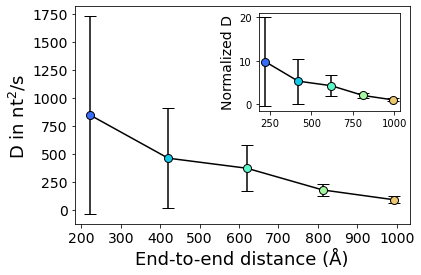

In [67]:
import seaborn as sns
dmop1 = np.loadtxt('diff_com_200_0.txt')
dmop2 = np.loadtxt('diff_com_400_0.txt')
dmop3 = np.loadtxt('diff_com_600_0.txt')
dmop4 = np.loadtxt('diff_com_800_0.txt')
dmop5 = np.loadtxt('diff_com_1000_0.txt')

data1_pm = [dmop1, dmop2, dmop3, dmop4, dmop5]
data1 = np.multiply(data1_pm, 15304)

means = []
stds = []

for item in data1:
    mean_d = np.mean(item)
    std_d = np.std(item)
    means.append(mean_d)
    stds.append(std_d)
    
x = [222.0, 420.0, 620.0, 812.0, 994.0]

means_mod = []
stds_mod = []

num = min(means)

for i in range(len(means)):
    a = means[i]/num
    b = stds[i]/num
    means_mod.append(a)
    stds_mod.append(b)
fig, ax = plt.subplots()

colors = sns.color_palette("rainbow")

axins = ax.inset_axes([0.55, 0.52, 0.42, 0.45])

for i in range(len(x)):
    ax.errorbar(x[i], means[i], yerr=stds[i], capsize=6, fmt='o', color=colors[i], markeredgecolor='black', ecolor='black', markersize=8, linestyle='-')
    if i > 0:
        ax.plot([x[i-1], x[i]], [means[i-1], means[i]], color='black')
    axins.errorbar(x[i], means_mod[i], yerr=stds_mod[i], capsize=6, fmt='o', color=colors[i], markeredgecolor='black', ecolor='black', markersize=8, linestyle='-')
    if i > 0:
        axins.plot([x[i-1], x[i]], [means_mod[i-1], means_mod[i]], color='black')
plt.ylabel('D in nt$^2$/s', fontsize=18)
plt.xlabel('End-to-end distance (Å)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#ax.set_ylim(-200, 2000)
axins.set_ylabel('Normalized D', fontsize=14)
plt.savefig('single_salt.png', dpi=300, bbox_inches='tight')